In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, WhitespaceTokenizer, TweetTokenizer

np.random.seed(17)

In [2]:
df = pd.read_excel('source.xlsx')
x_values = df[['house', 'text']]
y_values = df['season']
xtrain, xtest, ytrain, ytest = train_test_split(x_values, y_values)

In [3]:
def clean_article(article):
    art = re.sub("[^A-Za-z0-9' ]", '', article)
    art2 = re.sub("[( ' )( ')(' )]", ' ', art)
    art3 = re.sub('\s[A-Za-z]\s', ' ', art2)
    return art3.lower()

In [4]:
bow = CountVectorizer(stop_words = 'english', preprocessor = clean_article, tokenizer = TweetTokenizer().tokenize,
                      ngram_range=(1,2), max_features = 1000, max_df = 1.0, min_df = 1, binary = False)
training_data = bow.fit_transform(xtrain.text)
test_data = bow.transform(xtest.text)

In [5]:
dftrain = pd.DataFrame(training_data.toarray())
dftrain.columns = bow.get_feature_names()
dftest = pd.DataFrame(test_data.toarray())
dftest.columns = bow.get_feature_names()
dftrain.shape

(56, 1000)

In [6]:
clf = MultinomialNB()
model = clf.fit(dftrain, ytrain)
preds = model.predict(dftest)
accuracy = accuracy_score(ytest, preds)
print('accuracy: ', accuracy)

accuracy:  0.15789473684210525


In [7]:
d = {'targets': ytest.values, 'predictions': preds}
outs = pd.DataFrame(data = d)

In [8]:
l=[]
for i in range(len(outs)):
    if outs.targets.iloc[i][0:4] == outs.predictions.iloc[i][0:4]:
        l.append(1)
    else:
        l.append(0)
outs['right_year'] = l

In [9]:
outs

,targets,predictions,right_year
0,2010S,2010F,1
1,2010S,2010F,1
2,2010F,2010S,1
3,2018S,2018S,1
4,2018F,2010S,0
5,2018S,2010F,0
6,2018F,2010F,0
7,2010S,2010F,1
8,2010S,2018S,0
9,2010F,2010F,1


In [10]:
acc = sum(outs.right_year)/len(outs.right_year)
print('right-year accuracy: ', acc)

right-year accuracy:  0.47368421052631576


In [11]:
df = pd.read_excel('source.xlsx')
x_values = df[['house', 'text', 'season']]
y_values = df['this_year']
xtrain, xtest, ytrain, ytest = train_test_split(x_values, y_values)

In [12]:
bow = CountVectorizer(stop_words = 'english', preprocessor = clean_article, tokenizer = TweetTokenizer().tokenize,
                      ngram_range=(1,2), max_features = 500, max_df = 1.0, min_df = 1, binary = False)
training_data = bow.fit_transform(xtrain.text)
test_data = bow.transform(xtest.text)

In [13]:
dftrain = pd.DataFrame(training_data.toarray())
dftrain.columns = bow.get_feature_names()
dftest = pd.DataFrame(test_data.toarray())
dftest.columns = bow.get_feature_names()
dftrain.shape

(56, 500)

In [14]:
clf = MultinomialNB()
model = clf.fit(dftrain, ytrain)
preds = model.predict(dftest)
accuracy = accuracy_score(ytest, preds)
print('accuracy: ', accuracy)

accuracy:  0.6842105263157895


In [15]:
feature_names = np.array(list(dftrain.columns.values))
n=50
coefs_with_fns = sorted(zip(model.coef_[0], feature_names))
top = list(zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1]))

In [16]:
table1 = pd.DataFrame(columns=['informative for 2010', 'coefficient for 2010', 
                               'informative for 2018', 'coefficient for 2018'])
for i in top:
    table1 = table1.append({'informative for 2010': i[0][1], 'coefficient for 2010': i[0][0],
                           'informative for 2018': i[1][1], 'coefficient for 2018': i[1][0]}, 
                           ignore_index=True)
table1

,informative for 2010,coefficient for 2010,informative for 2018,coefficient for 2018
0,bailey,-8.097426,fashion,-4.165601
1,blouses,-8.097426,collection,-4.268785
2,burberry,-8.097426,said,-4.600919
3,cream,-8.097426,new,-4.600919
4,didn,-8.097426,time,-4.631690
5,gaultier,-8.097426,like,-4.696229
6,giannini,-8.097426,way,-4.961932
7,gray,-8.097426,season,-5.006384
8,meant,-8.097426,runway,-5.052904
9,miuccia prada,-8.097426,women,-5.101694


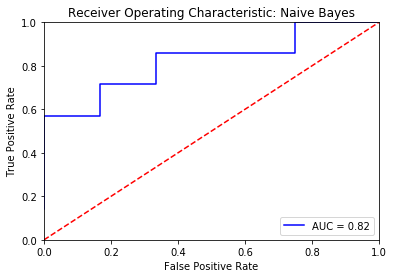

In [17]:
probas2 = model.predict_log_proba(dftest)
fpr2, tpr2, threshold2 = roc_curve(ytest, probas2[:,1])  
roc_auc2 = auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic: Naive Bayes')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()